# Imports and Setup

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from rl_env.pendulum_env import CustomInvertedPendulum
from agent.utils import SimplePolicyNet
from agent.evolution_strategy import EvolutionStrategy


# Hyperparameter Grid Search

In [8]:
hyperparams = {
    "n_perturb": [50, 100, 200],
    "sigma": [0.1, 0.2, 0.4],
    "alpha": [0.001, 0.002, 0.004],
    "hidden_dim": [16]
}

results = []

for n_perturb in hyperparams["n_perturb"]:
    for sigma in hyperparams["sigma"]:
        for alpha in hyperparams["alpha"]:
            for hidden_dim in hyperparams["hidden_dim"]:
                
                print(f"Running: sigma={sigma}, alpha={alpha}, n_perturb={n_perturb}, hidden_dim={hidden_dim}")

                env = CustomInvertedPendulum(torque_penalty=0.01)
                policy = SimplePolicyNet(input_dim=3, hidden_dim=hidden_dim, output_dim=1)
                es = EvolutionStrategy(policy=policy, env=env, n_perturb=n_perturb, sigma=sigma, alpha=alpha, episodes=5)

                num_iterations = 200
                performance = es.optimize(num_iterations)

                results.append({
                    "sigma": sigma,
                    "alpha": alpha,
                    "n_perturb": n_perturb,
                    "hidden_dim": hidden_dim,
                    "performance": performance
                })

                print("Final reward:", performance[-1])


Running: sigma=0.1, alpha=0.001, n_perturb=50, hidden_dim=16
Final reward: -1121.4415036616379
Running: sigma=0.1, alpha=0.002, n_perturb=50, hidden_dim=16
Final reward: -916.6967152478961
Running: sigma=0.1, alpha=0.004, n_perturb=50, hidden_dim=16
Final reward: -1317.2387771109345
Running: sigma=0.2, alpha=0.001, n_perturb=50, hidden_dim=16
Final reward: -239.4928574956569
Running: sigma=0.2, alpha=0.002, n_perturb=50, hidden_dim=16
Final reward: -141.85728527301407
Running: sigma=0.2, alpha=0.004, n_perturb=50, hidden_dim=16
Final reward: -675.7263499974054
Running: sigma=0.4, alpha=0.001, n_perturb=50, hidden_dim=16
Final reward: -135.35766731598014
Running: sigma=0.4, alpha=0.002, n_perturb=50, hidden_dim=16
Final reward: -157.48826589099875
Running: sigma=0.4, alpha=0.004, n_perturb=50, hidden_dim=16
Final reward: -179.79556272773613
Running: sigma=0.1, alpha=0.001, n_perturb=100, hidden_dim=16
Final reward: -1282.4888821973723
Running: sigma=0.1, alpha=0.002, n_perturb=100, hidd

# Plot Reward Curves

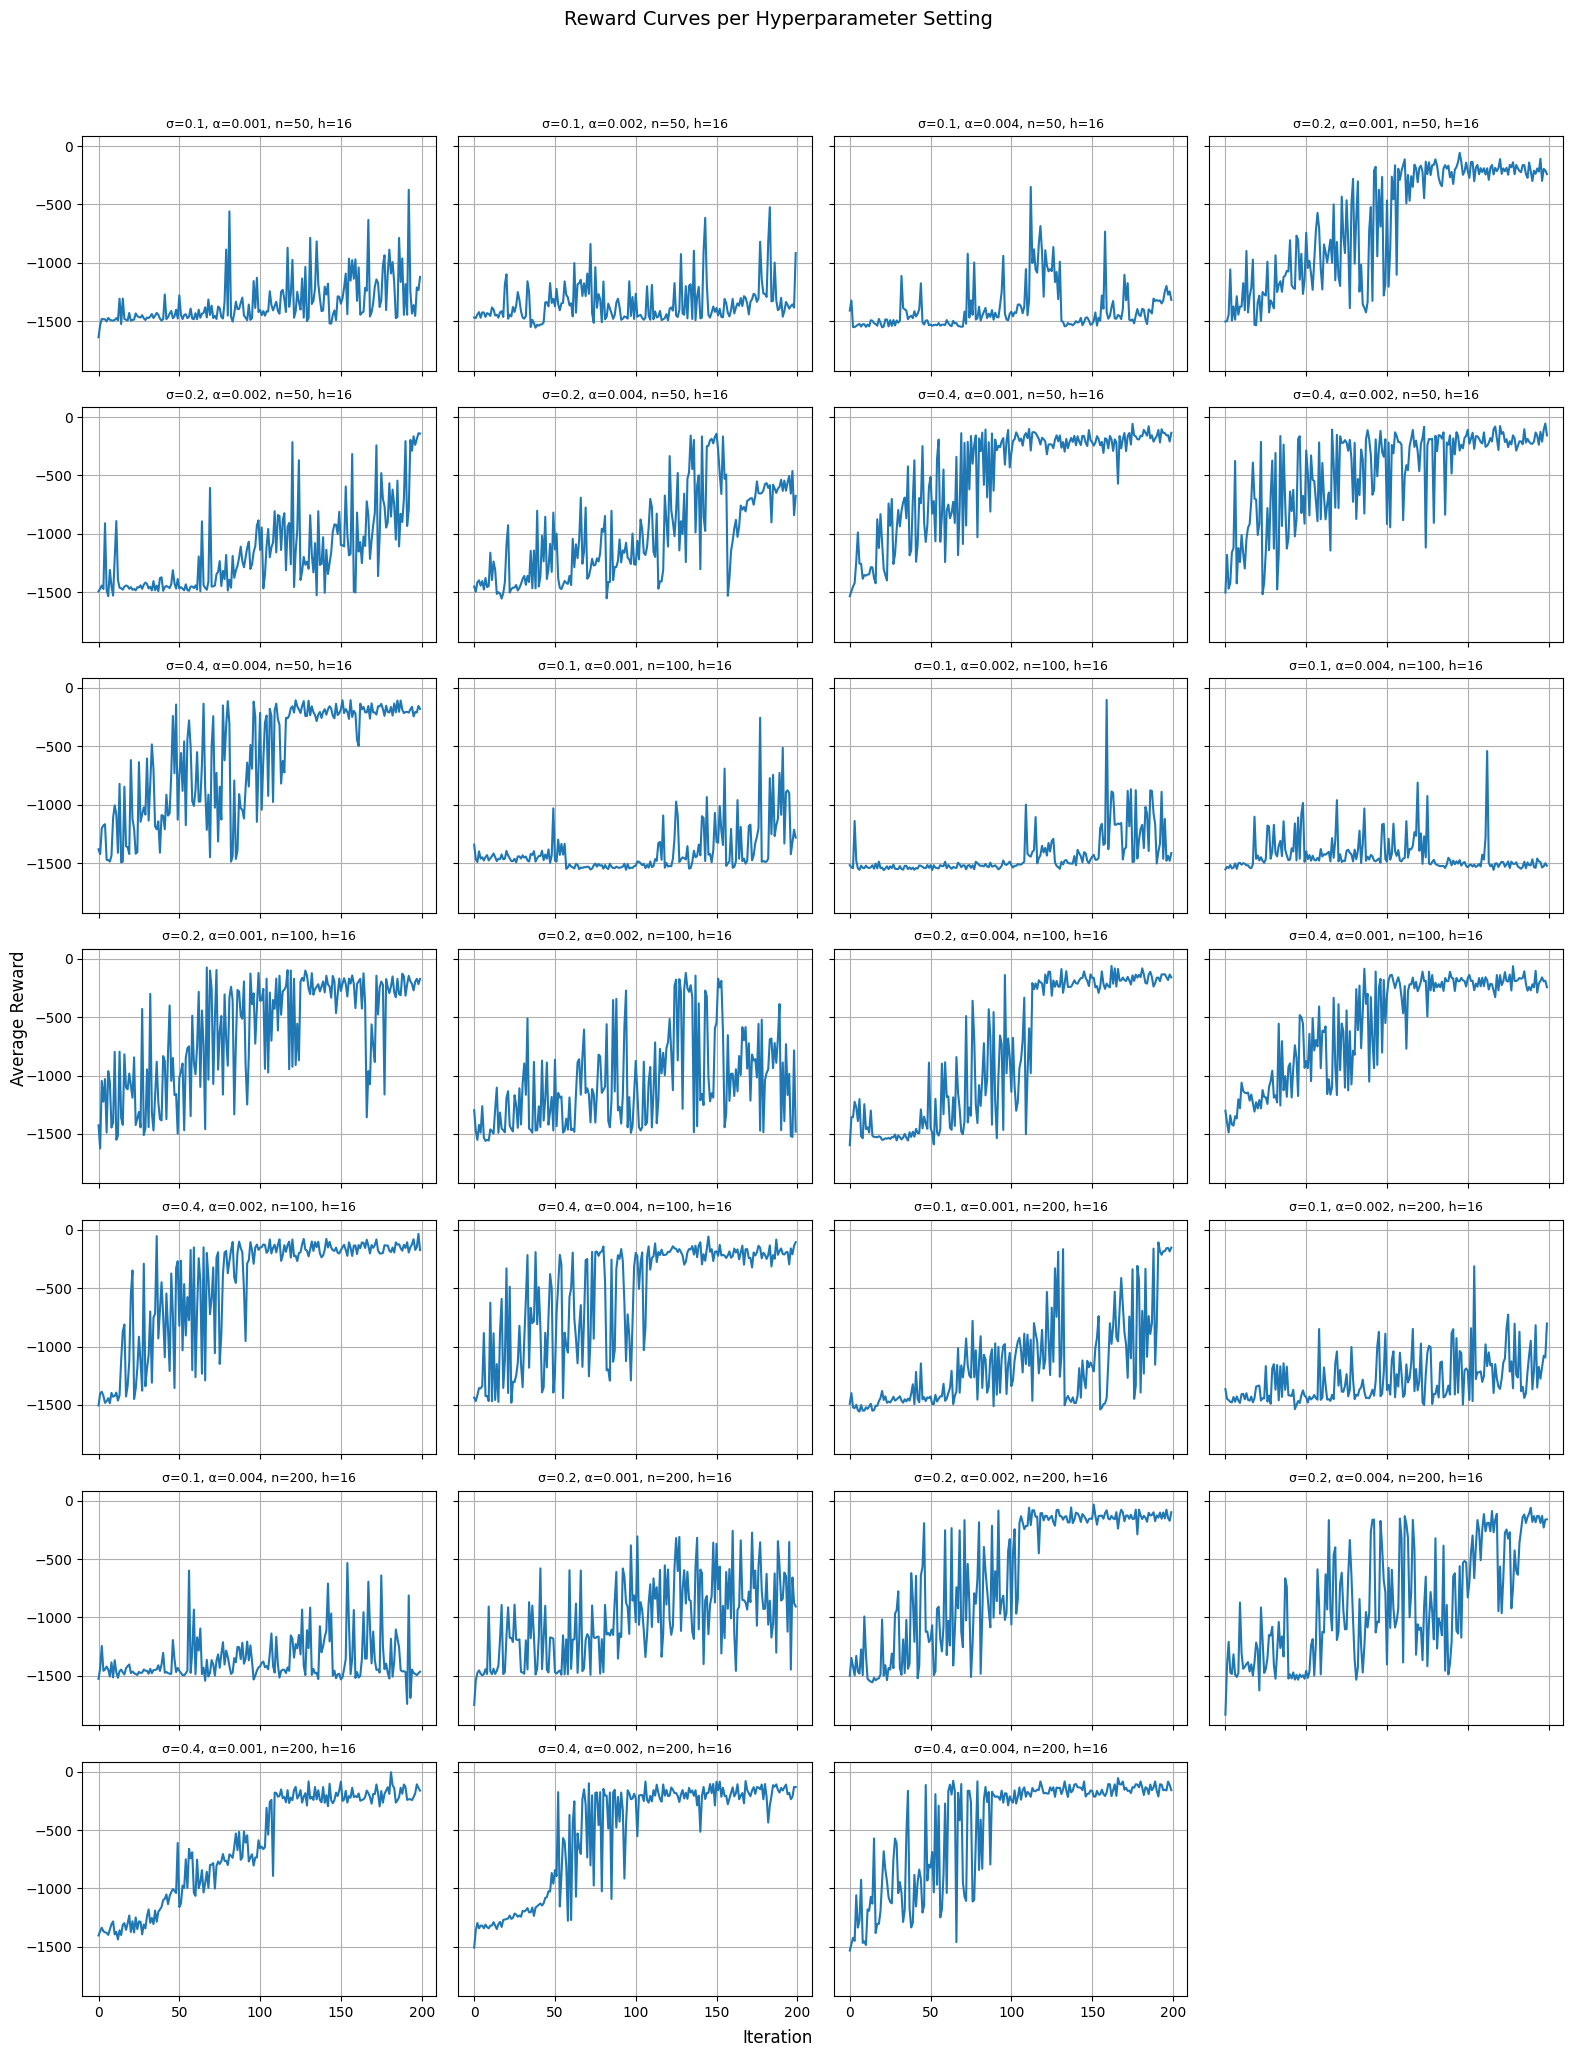

In [9]:
import matplotlib.pyplot as plt
import math

# Number of results
n = len(results)

# Set grid size: 4 columns, as many rows as needed
cols = 4
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)

for i, result in enumerate(results):
    row = i // cols
    col = i % cols
    ax = axs[row, col] if rows > 1 else axs[col]  # handle single-row edge case

    label = f"σ={result['sigma']}, α={result['alpha']}, n={result['n_perturb']}, h={result['hidden_dim']}"
    ax.plot(result["performance"])
    ax.set_title(label, fontsize=9)
    ax.grid(True)


# Turn off unused subplots
for j in range(n, rows * cols):
    row = j // cols
    col = j % cols
    ax = axs[row, col] if rows > 1 else axs[col]
    ax.axis("off")

fig.suptitle("Reward Curves per Hyperparameter Setting", fontsize=14)
fig.supxlabel("Iteration")
fig.supylabel("Average Reward")
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


# Summary Table of Final Performance

In [10]:
from tabulate import tabulate

summary = []

for result in results:
    final_reward = result["performance"][-1]
    avg_last_10 = np.mean(result["performance"][-10:])
    summary.append([
        result["sigma"],
        result["alpha"],
        result["n_perturb"],
        result["hidden_dim"],
        round(final_reward, 2),
        round(avg_last_10, 2)
    ])

headers = ["σ", "α", "n_perturb", "hidden_dim", "Final Reward", "Avg Last 10"]
summary.sort(key=lambda x: x[4], reverse=True)
print(tabulate(summary, headers=headers, tablefmt="pretty"))


+-----+-------+-----------+------------+--------------+-------------+
|  σ  |   α   | n_perturb | hidden_dim | Final Reward | Avg Last 10 |
+-----+-------+-----------+------------+--------------+-------------+
| 0.2 | 0.002 |    200    |     16     |    -98.32    |   -127.17   |
| 0.4 | 0.004 |    100    |     16     |    -106.0    |   -186.92   |
| 0.4 | 0.002 |    200    |     16     |   -131.34    |   -163.28   |
| 0.4 | 0.001 |    50     |     16     |   -135.36    |   -152.76   |
| 0.2 | 0.002 |    50     |     16     |   -141.86    |   -329.31   |
| 0.1 | 0.001 |    200    |     16     |    -152.4    |   -233.82   |
| 0.4 | 0.002 |    50     |     16     |   -157.49    |   -162.9    |
| 0.2 | 0.004 |    100    |     16     |   -158.44    |   -154.27   |
| 0.4 | 0.004 |    200    |     16     |   -158.59    |   -142.71   |
| 0.2 | 0.004 |    200    |     16     |   -159.44    |   -162.84   |
| 0.4 | 0.001 |    200    |     16     |   -161.66    |   -190.26   |
| 0.2 | 0.001 |    1